### Ejecutables comúnes en la documentación de proyectos: 

**Main:** El único ejecutable, se apoya en los demás scripts.<br>
**Utils:** Nos ayuda a automatizar acciones pequeñas.<br>
**Models:** Contiene únicamente el modelo que se generó. <br>
**Config:** Incluye los **path** que se utilizarán a lo largo del pipeline y configuraciones de prueba para el modelo.<br>

------- **Práctica** --------

El objetivo de este proyecto es generar un modelo que nos permita clasificar correctamente sí una persona puede ganar o no $50K anuales.

In [ ]:
# Librerías a utilizar en el ejemplo
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree


Cargando la información:



In [ ]:
data = pd.read_csv('/content/income.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bi
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
 15  income_bi       32560 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


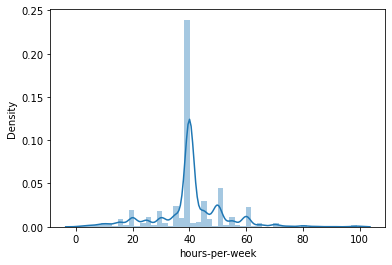

In [ ]:
sns.distplot(data['hours-per-week']);

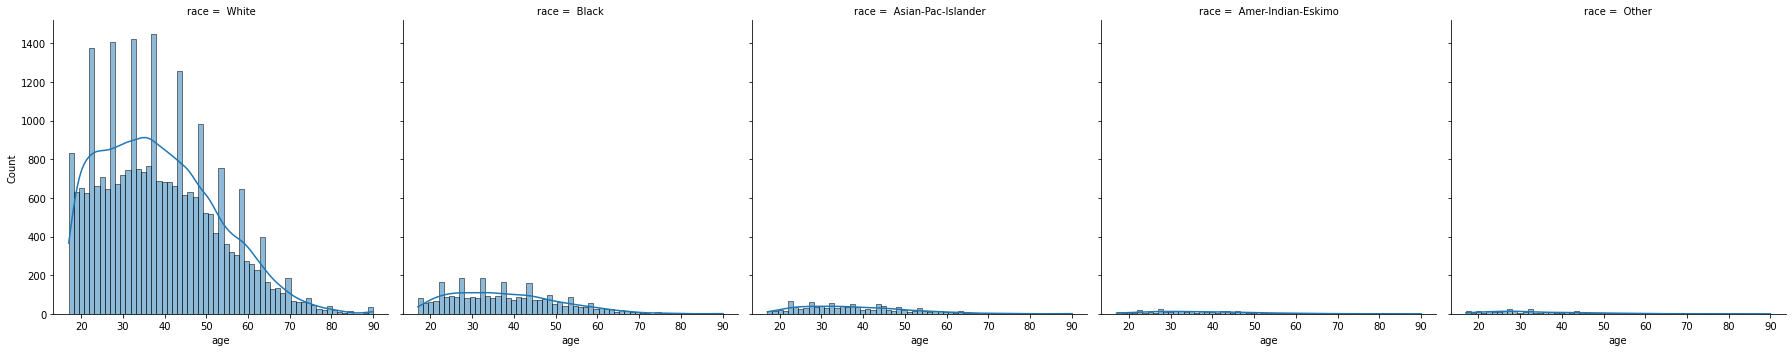

In [ ]:
sns.displot(data=data, x="age", col="race", kde=True);

### Generando un modelo

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

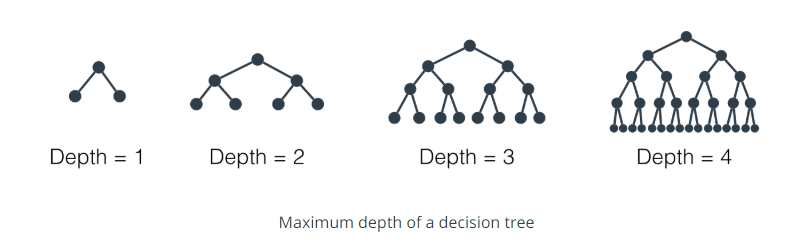

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_bi'],
      dtype='object')

In [ ]:
## Creación del modelo y evaluación

dropear = ['fnlwgt','capital-gain','capital-loss','income','native-country','income_bi']
dummies = ['workclass','education','marital-status','occupation','relationship','race','sex']
target = 'income_bi'

In [ ]:
w = data.drop(columns = dropear, axis = 1)

In [ ]:
X = pd.get_dummies(w,dummies)

In [ ]:
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 99)

In [ ]:
t = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth =7 )

In [ ]:
model = t.fit(X_train,y_train)

In [ ]:
score_entrenamiento = model.score(X_train,y_train)
score_prueba = model.score(X_test,y_test)

In [ ]:
print(f'Score de entrenamiento: {score_entrenamiento} \nScore de Prueba: {score_prueba}')

Score de entrenamiento: 0.8357263513513513 
Score de Prueba: 0.8269348894348895
